<h1><center>Homework 3</center></h1>

<h3>Submission Instructions</h3>
<p>
For submission, you only need to submit your Jupyter Notebook file named "StudentName_ID.ipynb"

If you have any questions, you can contact me via kamard@itu.edu.tr
</p>

<h3> Homework Instructions </h3>

<p>In this homework, you will implement Girvan-Newman algorithm, and use the algorithm to decompose the network into a number of modules so that it has the highest modularity. Remember the steps of Girvan-Newman algorithm from Graph Theory Blink 9.3:

<ol>
  <li>Calculate the betweenness centrality of each edge in graph G</li>
  <li>Remove the edge with the highest betweenness centrality. Choose randomly in case same score occurs.</li>
  <li>Recalculate the betweenness centrality of all remaining edges</li>
  <li>Repeat steps 2 and 3 until no edges remain. </li>
</ol>

You will need to modify the above steps so that you find the number of connected components that has the highest modularity. To do that, you can calculate modularity each time new connected component is formed during the Girvan-Newman algorithm, and find the decomposition with highest modularity. Don't forget to compute the modularity of the initial network, as network might not consist any modules 

<h2>WHAT YOU NEED TO DO</h2>
<ol>
    <li> Read and visualize the given graph adjacency matrix files. Give brief comments about the networks' hiearchy and modularity <b>(20p)</b>
    <li> Implement the Girvan-Newman algorithm: Write a function that uses Girvan-Newman algorithm to find the number of connected components that gives the highest modularity. In the same function or another function, return the new graph with the number of connected components you have found (basically, remove edges until the number of connected components are equal to the one you found with your algorithm). <b>(60p)</b>
    <li>Apply the function on the given networks. Visualize the final results. Assign different colors to each node in the visualization. <b>(10p)</b>
    <li> What conclusions can you derive about the networks after you run the algorithm on them and visualize the final result? Give brief comments. <b>(10p)</b>
    <li><b>BONUS</b> What are the key differences between Agglomerative Clustering and Divisive Clustering? Which one of these does the Girvan-Newman algorithm belong to? Explain.<b>(3p)</b> 

Below, I have given you some basic functions to start with. 
</p>

In [94]:
#GAMZE MADEN
#504202514
#########################
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt

You can use RandomGraph function to create a random graph that returns the graph as both networkx.Graph and adjacency matrix as numpy.array.

(Optional, will not affect your grade) You can modify the VisualiseGraph function to give each connected component different graph, or make other interesting visualizations. Play with it however you want!

In [105]:
def RandomAdjacencyMatrix(n = 10, p = 0.5):
    M = np.zeros((n,n), dtype=np.uint8)
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                M[i,j], M[j, i] = 1, 1
    return M

def RandomGraph(n = 10, p = 0.5):
    '''
    Creates a random networkx undirected, unweighted graph
    
    Inputs:
        n: number of nodes in graph
        p: probability of an edge being included
        
    Outputs:
        M: Adjacency matrix as numpy array
        G: nx Graph
        
    '''
    M = RandomAdjacencyMatrix(n, p)
    edges = np.transpose(np.where(M==1))
    
    G = nx.Graph()
    for i in range(edges.shape[0]):
        G.add_edge(edges[i, 0], edges[i, 1])
    
    return G, M
#I modified this code to print each node with different color
def VisualizeGraph(G):
    plt.figure(figsize=(10,8)) 
    nx.draw_networkx(G,node_color=range(G.number_of_nodes()))
    plt.show()
    

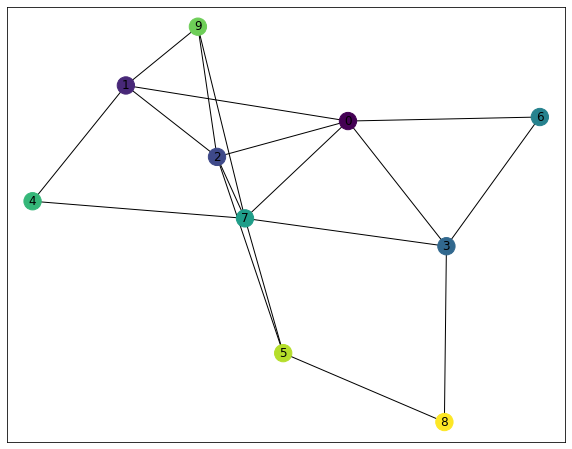

In [106]:
n = 10
p = 0.5
G, M = RandomGraph(n, p)
VisualizeGraph(G)

## You can start from here.

Implement all your codes and write all your comments below this cell. 

For the algorithm; you are only allowed to use networkx to compute <b>modularity, connected components and betwenness centralities.</b> You need to implement Girvan-Nerman and rest of the algorithm by yourself. 

In [125]:
import pandas as pd
import random

def Girvan_Nerman(A):
    #connected component and modularity arrays are initialized
    cc=[]
    highest_mod=[]
    edges=[]
    #I always take a copy of incoming parameter
    copied_array=A
    #create graph from incoming adjacency matrix
    G = nx.from_numpy_matrix(A)
    #add number of connected component of initial graph G
    cc.append(nx.number_connected_components(G))
    #dictionary to store {edge: modularity} pairs
    dict_bc=dict()
    #calculate betweenness centrality of initial graph
    dict_bc=nx.edge_betweenness_centrality(G) 
    #get max modularity of initial graph
    max_value = max(dict_bc.values())
    #get max modularity index of initial graph
    max_key = max(dict_bc, key=dict_bc.get)   
    #add this edge pair (u,v) to seperate array
    edges.append(max_key)
    #store highest modularity value of initial graph
    highest_mod.append(max_value)
        
    #loop until edge-1 count since I already calculated the initial graph
    for i in range(G.number_of_edges()-1):
       
        #remove edge with highest modularity
        G.remove_edge(max_key[0],max_key[1])
        dict_bc=dict()
        #calculate betweenness centrality starting 
        dict_bc=nx.edge_betweenness_centrality(G) 
        #get max modularity 
        max_value = max(dict_bc.values())
        #get max modularity index
        max_key = max(dict_bc, key=dict_bc.get)
        #store edge pairs (u,v)
        edges.append(max_key)
        #store modularity of current graph
        highest_mod.append(max_value)
        #store number of connected component along with edge having highest modularity 
        cc.append(nx.number_connected_components(G))
    print("Highest Modularity: ",max(highest_mod))
    print("CC number of highest modularity: ",cc[np.argmax(highest_mod)])
    
    #assign initial graph to G_
    G_ = nx.from_numpy_matrix(copied_array)
    temp=nx.Graph()

    #choose edge with highest modularity
    if max(highest_mod)==highest_mod[0]:
        print("Initial Graph has the highest modularity")
        initial_graph = nx.from_numpy_matrix(copied_array)
        return initial_graph
    else:        
        #get connected component count with the highest modularity
        highestmod_cc=cc[np.argmax(highest_mod)]
        new_cc=nx.number_connected_components(G_)
        i=0
        #loop until desired CC
        while new_cc<=highestmod_cc:
            
            #get edges with the highest modularity value
          #  chosen_edge=edges[np.argmax(highest_mod)]
           # print("Removed edge: ", chosen_edge)
            
            #remove edges iteratively
            if G_.has_edge(edges[i][0],edges[i][1]):
                G_.remove_edge(edges[i][0],edges[i][1])
                #re-calculate cc number
                new_cc=nx.number_connected_components(G_)
                #if currently removed edge suddenly causes more connected component than desired:
                if new_cc>highestmod_cc:
                    #then add that edge back
                    G_.add_edge(edges[i][0],edges[i][1])
                    return G_
                else:
                    print("Removed edge: (",edges[i][0], "," ,edges[i][1],")")
            #set current highest_mod to 0 to move to next highest modularity
            highest_mod[np.argmax(highest_mod)]=0
            i=i+1
        return G_             

Highest Modularity:  0.4666666666666667
CC number of highest modularity:  1
Removed edge: ( 3 , 7 )
Removed edge: ( 0 , 3 )
Removed edge: ( 0 , 6 )


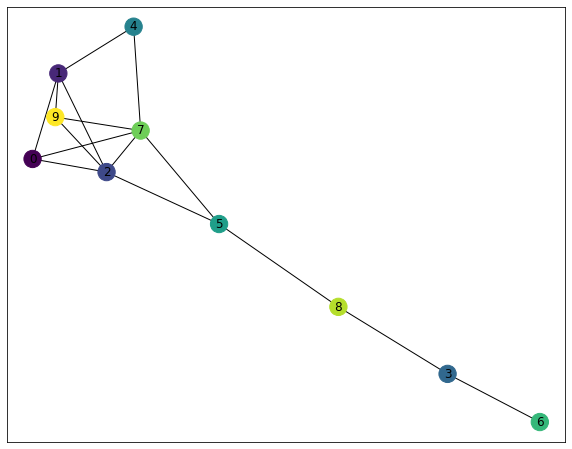

In [126]:
graph=Girvan_Nerman(M)
VisualizeGraph(graph)

Data 1 ORIGINAL GRAPH


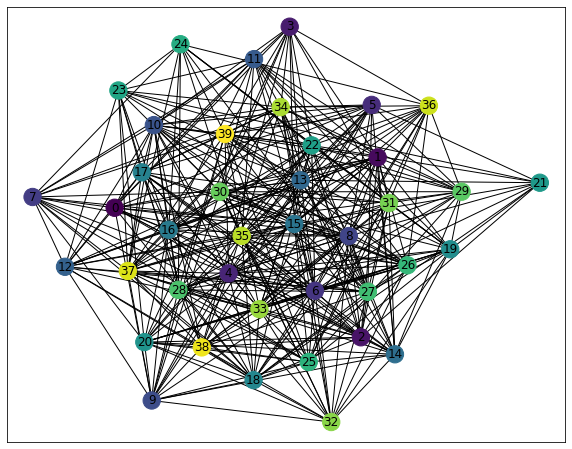

In [127]:
print("Data 1 ORIGINAL GRAPH")
data1=np.load('NetworkData1.npy')
S = nx.from_numpy_matrix(data1)
VisualizeGraph(S) 

Data 1 GRAPH AFTER ALGORITHM
Highest Modularity:  0.05
CC number of highest modularity:  1
Removed edge: ( 18 , 21 )
Removed edge: ( 13 , 21 )
Removed edge: ( 15 , 21 )
Removed edge: ( 21 , 22 )
Removed edge: ( 6 , 21 )
Removed edge: ( 19 , 21 )
Removed edge: ( 8 , 21 )
Removed edge: ( 5 , 21 )
Removed edge: ( 2 , 21 )


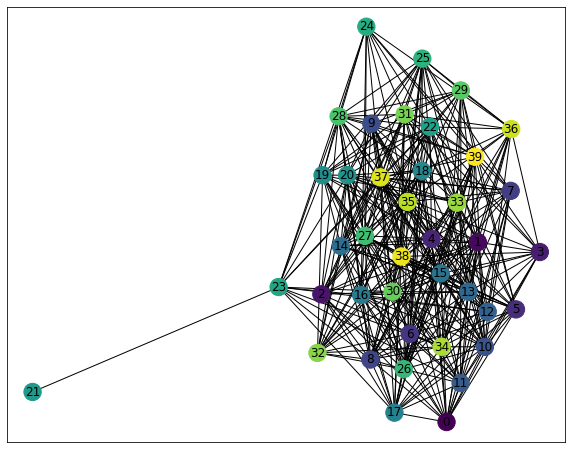

In [128]:
print("Data 1 GRAPH AFTER ALGORITHM")
data1_G=Girvan_Nerman(data1)
VisualizeGraph(data1_G) 

Here for Network Data 1 the connected component number is 1. This network is a "non-modular graph". Among 3 networks this has the lowest modularity. I observe node (by eye) 21 is the furthest node from central and its edges get erased one by one until graph has the final look before decomposing into 2 CC. 

Data 2 ORIGINAL GRAPH


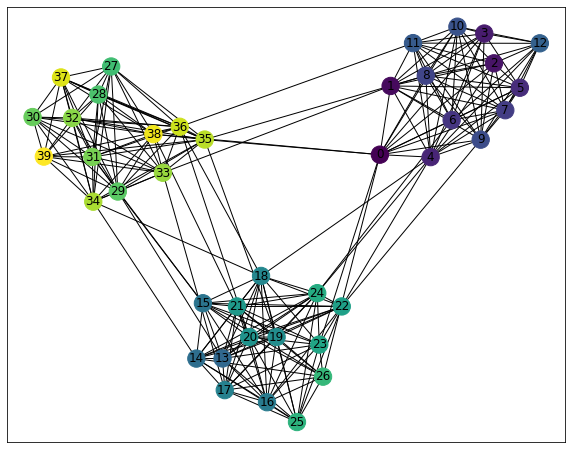

In [129]:
print("Data 2 ORIGINAL GRAPH")
data2=np.load('NetworkData2.npy')
S = nx.from_numpy_matrix(data2)
VisualizeGraph(S) 

Data 2 GRAPH AFTER ALGORITHM
Highest Modularity:  0.45
CC number of highest modularity:  1
Removed edge: ( 11 , 36 )
Removed edge: ( 8 , 35 )
Removed edge: ( 1 , 33 )
Removed edge: ( 0 , 35 )
Removed edge: ( 0 , 38 )
Removed edge: ( 4 , 18 )
Removed edge: ( 6 , 24 )
Removed edge: ( 4 , 24 )
Removed edge: ( 4 , 22 )
Removed edge: ( 9 , 22 )
Removed edge: ( 0 , 23 )


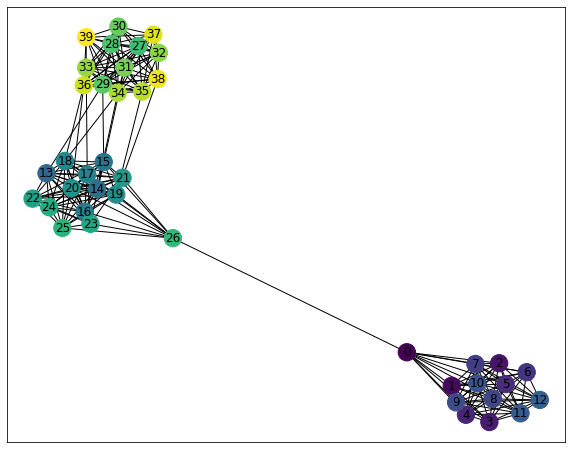

In [130]:
print("Data 2 GRAPH AFTER ALGORITHM")
data2_G=Girvan_Nerman(data2)
VisualizeGraph(data2_G) 

In this network number of connected component with highest modularity is again 1. After removing of edges we can observe clusters its inter-moduler links which indicates this network is "modular" and shows adaptation to the changes. Independence between subsystems provides any catastrophic dysfunction. Node 0 from purple cluster showing highest betweenness centrality and before breaking down to 2 CC node 0 and node 26 have one last connection.  

Data 3 ORIGINAL GRAPH


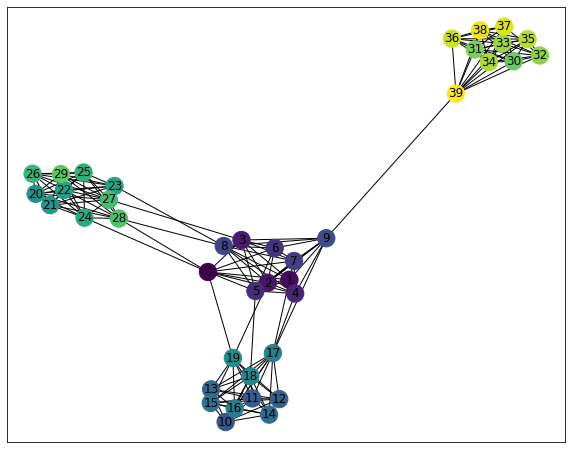

In [131]:
print("Data 3 ORIGINAL GRAPH")
data3=np.load('NetworkData3.npy')
S = nx.from_numpy_matrix(data3)
VisualizeGraph(S) 

Data 3 GRAPH AFTER ALGORITHM
Highest Modularity:  0.38461538461538464
CC number of highest modularity:  1
Initial Graph has the highest modularity


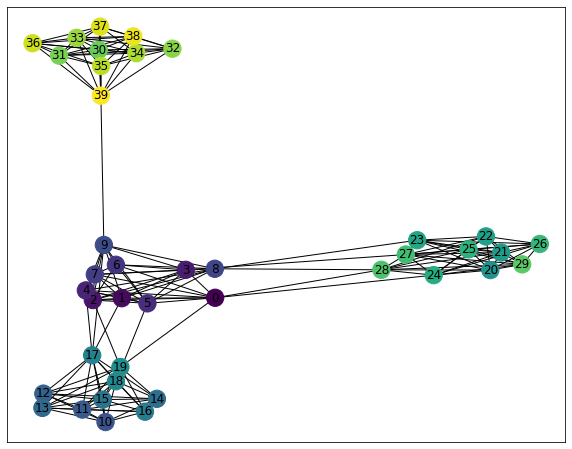

In [132]:
print("Data 3 GRAPH AFTER ALGORITHM")
data3_G=Girvan_Nerman(data3)
VisualizeGraph(data3_G) 

This network has the highest modularity at its initial version. So the algorithm returns graph without any edge removal. Here we can see "hierarchical modularity" as in modules within modules forming 4 clusters.

BONUS

Hierarchical Agglomerative vs Divisive clustering          

*Divisive clustering is more complex as compared to agglomerative clustering until each data having its own singleton cluster.
*Divisive clustering is more efficient if we do not generate a complete hierarchy all the way down to individual data leaves. Time complexity of a naive agglomerative clustering is O(n3) because we exhaustively scan the N x N matrix for the lowest distance in each of N-1 iterations. By using some more optimizations it can be brought down to O(n2). Whereas for divisive clustering given a fixed number of top levels, using an efficient flat algorithm like K-Means, divisive algorithms are linear in the number of patterns and clusters.
*Divisive algorithm is also more accurate. Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data whereas divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions.

*Girvan-Newman belongs to divisive clustering